### NAMA : MUHAMMAD IHSAN AL KHWARITSMI
### NRP  : 5025221211

In [32]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}") 

pandas version: 2.2.3
NumPy version: 2.1.3
matplotlib version: 3.10.1


In [33]:
# Baca data
df = pd.read_csv('data/HARGA_RUMAH_JAKSEL.csv', header=1)

In [34]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,JAKSEL
1,"19,000,000,000",824,800,4,4,ADA,JAKSEL
2,"4,700,000,000",500,400,4,3,ADA,JAKSEL
3,"4,900,000,000",251,300,5,4,ADA,JAKSEL
4,"28,000,000,000",1340,575,4,5,ADA,JAKSEL


In [35]:
print("Kolom dalam DataFrame:", df.columns.tolist())
price_col = [col for col in df.columns if 'HARGA' in col.upper()][0]
print(f"Menggunakan kolom harga: {price_col}\n")


# Hapus karakter non-digit, ubah ke numeric, lalu konversi ke int (tanpa decimal)
df[price_col] = (
    df[price_col]
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)
df.info()

Kolom dalam DataFrame: ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']
Menggunakan kolom harga: HARGA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [36]:
#Mengganti satuan harga agar lebih readable
df['HARGA'] = (df['HARGA']/1000000).astype(int)

In [37]:
# menghapus feature kota karena semua data berasal dari JAKSEL
df = df.drop(columns=['KOTA'])
df.head()


,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,ADA
1,19000,824,800,4,4,ADA
2,4700,500,400,4,3,ADA
3,4900,251,300,5,4,ADA
4,28000,1340,575,4,5,ADA


### Data Analysis 

In [38]:
df.describe()


,HARGA,LT,LB,JKT,JKM
count,"1,001","1,001","1,001","1,001","1,001"
mean,"17,475",531,487,4,4
std,"20,795",531,453,2,2
min,430,22,38,1,1
25%,"6,750",220,300,4,3
50%,"13,500",400,411,4,4
75%,"20,000",677,600,5,4
max,"250,000","6,790","10,000",27,27


In [39]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 70

In [40]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 0

In [41]:
# Cek Nilai Hilang
print("Jumlah nilai hilang per kolom:")
print(df.isnull().sum(), end="\n\n")


Jumlah nilai hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64



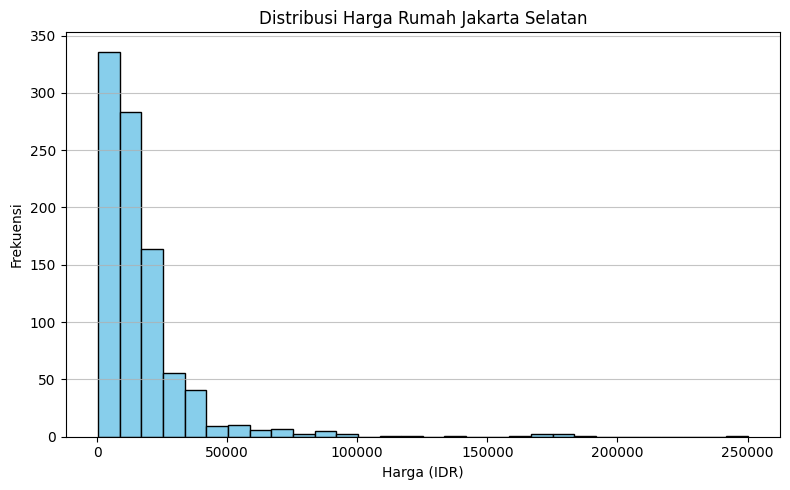

In [42]:
# df.HARGA.plot.hist();
# 3. Plot histogram distribusi harga
plt.figure(figsize=(8, 5))
plt.hist(df[price_col], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Rumah Jakarta Selatan')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

/tmp/ipykernel_105336/1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_105336/1229596645.py:15: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_105336/1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_105336/1229596645.py:15: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, 

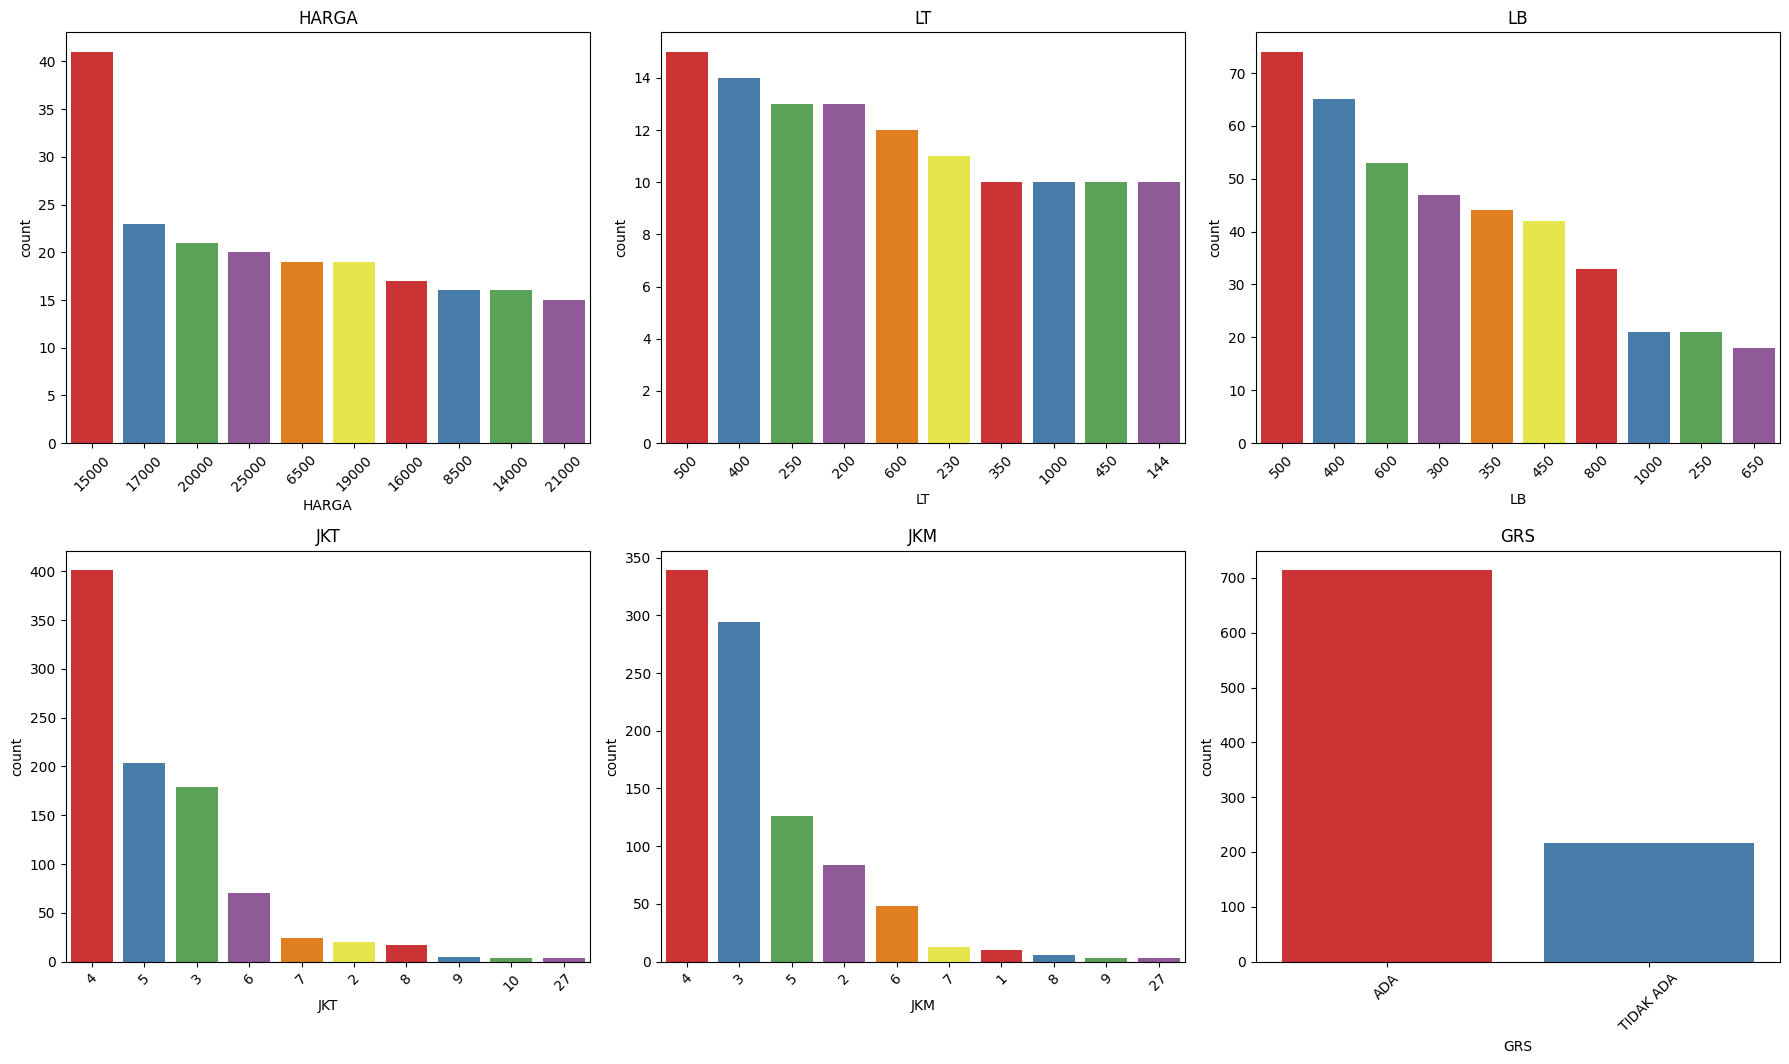

In [43]:
color_palette = sns.color_palette("Set1", len(df.columns))

n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = df[column].value_counts().nlargest(10).index
    
    filtered_df = df[df[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_105336/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_105336/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_105336/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_105336/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_105336/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_105336/1245511591.py:9: U

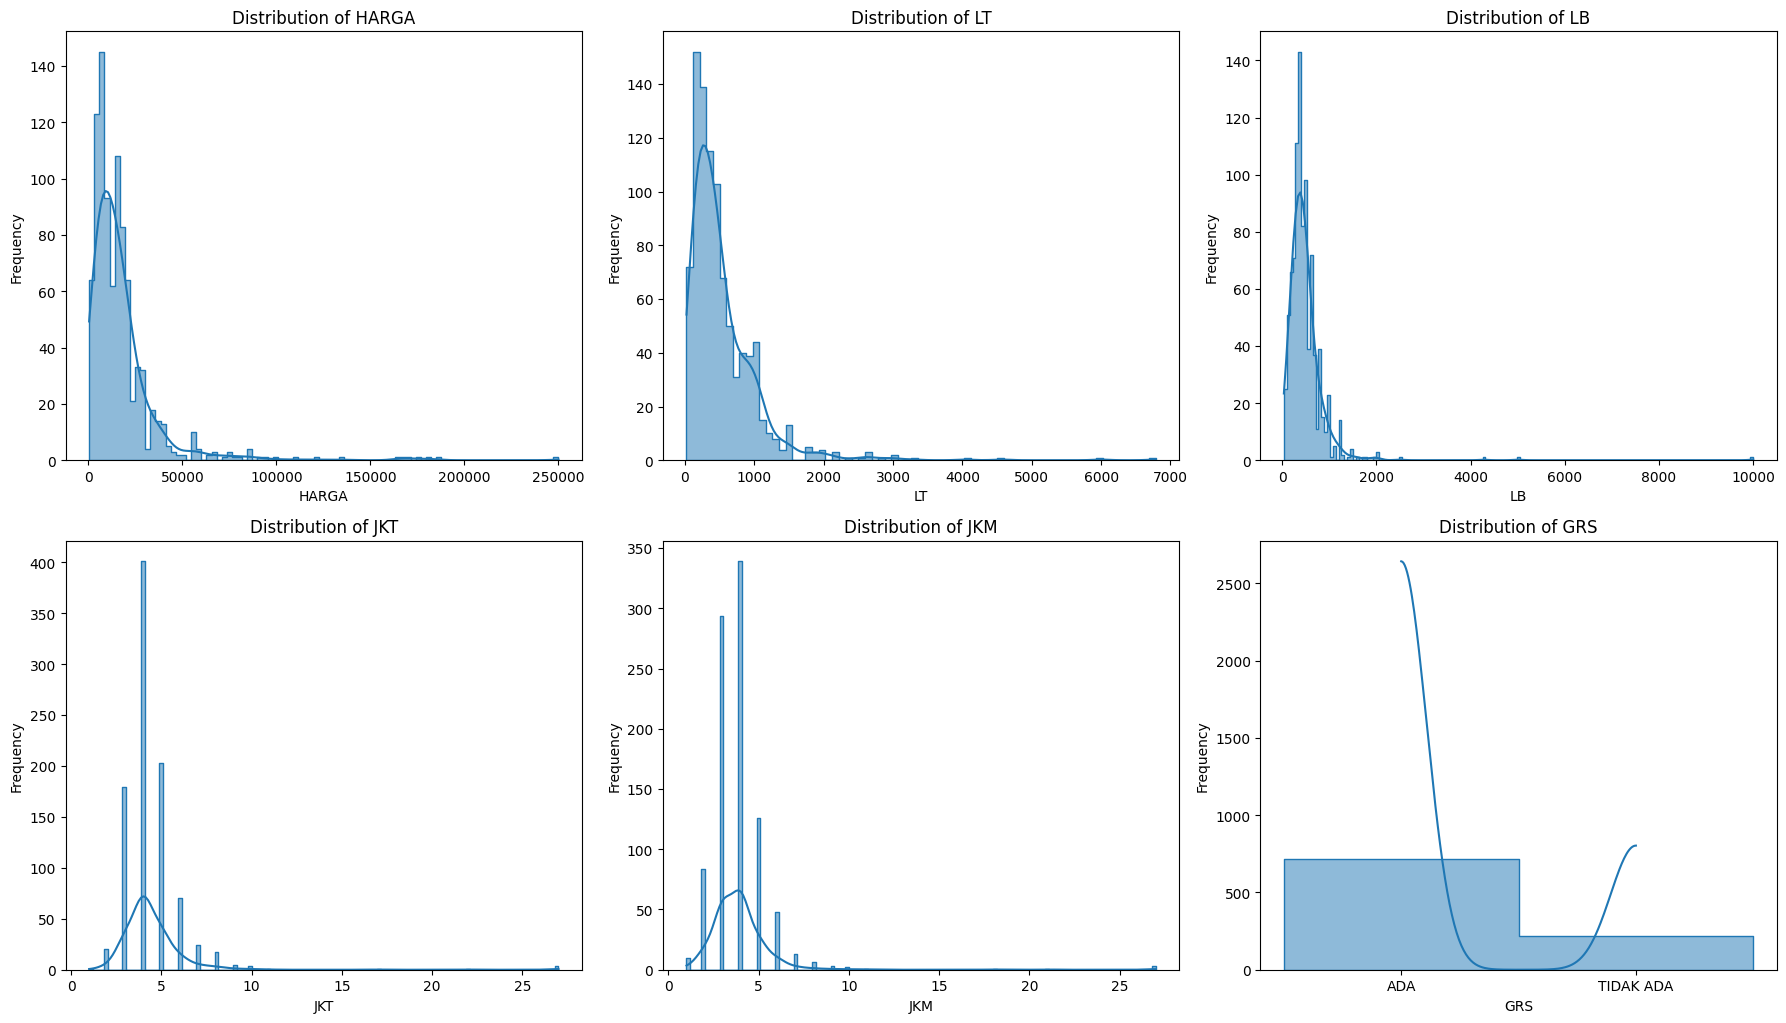

In [44]:
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
df['GRS'] = df['GRS'].apply(lambda x: 1 if str(x).strip().upper() == 'ADA' else 0)
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,1
1,19000,824,800,4,4,1
2,4700,500,400,4,3,1
3,4900,251,300,5,4,1
4,28000,1340,575,4,5,1


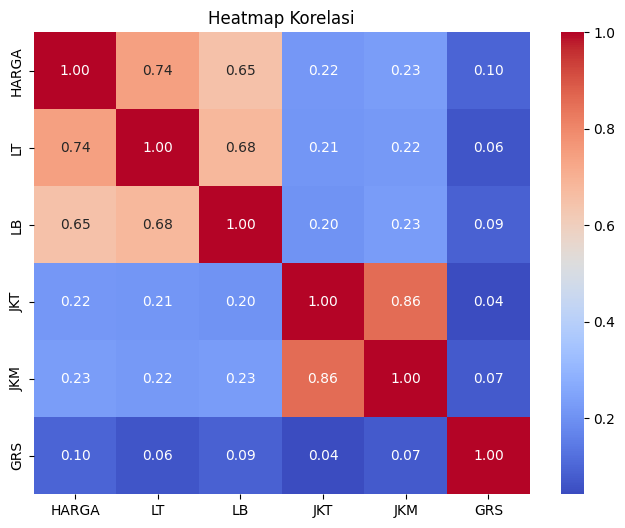

In [46]:
corr = df.corr()

# Gambar heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Feature Engineering

Hal ini dibutuhkan agar model dapat mendeteksi pola yang lebih kompleks.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Persiapan data
data = df.dropna(subset=['LT', 'LB', 'JKT', 'HARGA'])
#merubah category menjadi angka 1 dan 0
df['GRS'] = df['GRS'].apply(lambda x: 1 if str(x).strip().upper() == 'ADA' else 0)


In [49]:
import numpy as np
# Data sepertinya mengandung banyak outlier
Q1 = df['HARGA'].quantile(0.25)
Q3 = df['HARGA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buang data di luar batas tersebut (outlier)
df_filtered = df[(df['HARGA'] >= lower_bound) & (df['HARGA'] <= upper_bound)].copy()
print(f'Jumlah data setelah buang outlier: {len(df_filtered)}')

Jumlah data setelah buang outlier: 871


In [50]:
df_filtered['LB_LT_ratio'] = df_filtered['LB'] / df_filtered['LT']
df_filtered['LT_squared'] = df_filtered['LT'] ** 2
df_filtered['LB_squared'] = df_filtered['LB'] ** 2
df_filtered['JKT_squared'] = df_filtered['JKT'] ** 2


In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns='HARGA')
y = np.log1p(df_filtered['HARGA'])

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [52]:
print(f"Train shape: {X_train.shape} , {y_train.shape}")
print(f"Test shape: {X_test.shape} , {y_test.shape}")

Train shape: (696, 9) , (696, 1)
Test shape: (175, 9) , (175, 1)


In [53]:
import tensorflow as tf

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer,
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [55]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=25, 
                                                  restore_best_weights=True, 
                                                  mode='min', 
                                                  verbose=1)

history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8901 - mean_absolute_error: 0.7047 - val_loss: 0.4295 - val_mean_absolute_error: 0.4788
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4301 - mean_absolute_error: 0.4937 - val_loss: 0.3606 - val_mean_absolute_error: 0.4392
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3864 - mean_absolute_error: 0.4610 - val_loss: 0.3065 - val_mean_absolute_error: 0.4197
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3006 - mean_absolute_error: 0.4108 - val_loss: 0.2764 - val_mean_absolute_error: 0.3944
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3327 - mean_absolute_error: 0.4447 - val_loss: 0.2863 - val_mean_absolute_error: 0.3975
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2606 - mean_absolute_error: 0.3895 - val_loss: 0.2677 - val_mean_absolute_error: 0.3946
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2731 - mean_absolute_error: 0.4091 - val_los

## Model Evalution

In [56]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Mean Squared Error - scaled): {results[0]:.4f}")
print(f"Test Mean Absolute Error (scaled): {results[1]:.4f}")

Test Loss (Mean Squared Error - scaled): 0.1805
Test Mean Absolute Error (scaled): 0.3247


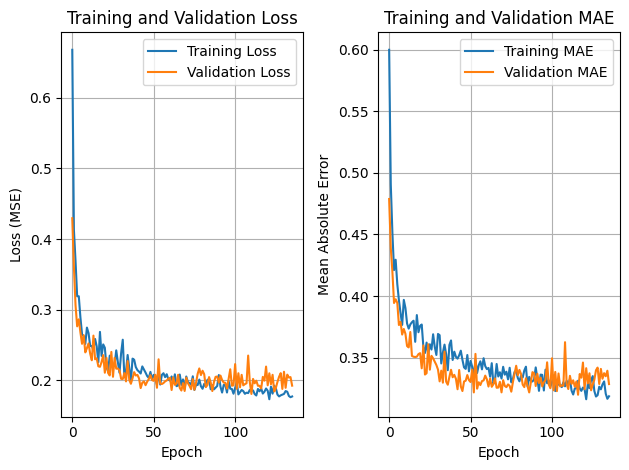

In [57]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
     Harga Aktual (Rp)  Harga Prediksi (Rp)
0                7,900               12,242
1                5,200                3,114
2               15,000               17,533
3               14,000               13,391
4                1,450                1,911
..                 ...                  ...
170              4,500                6,926
171              4,300                3,899
172             38,000               17,783
173              7,300                8,992
174             34,000               16,070

[175 rows x 2 columns]


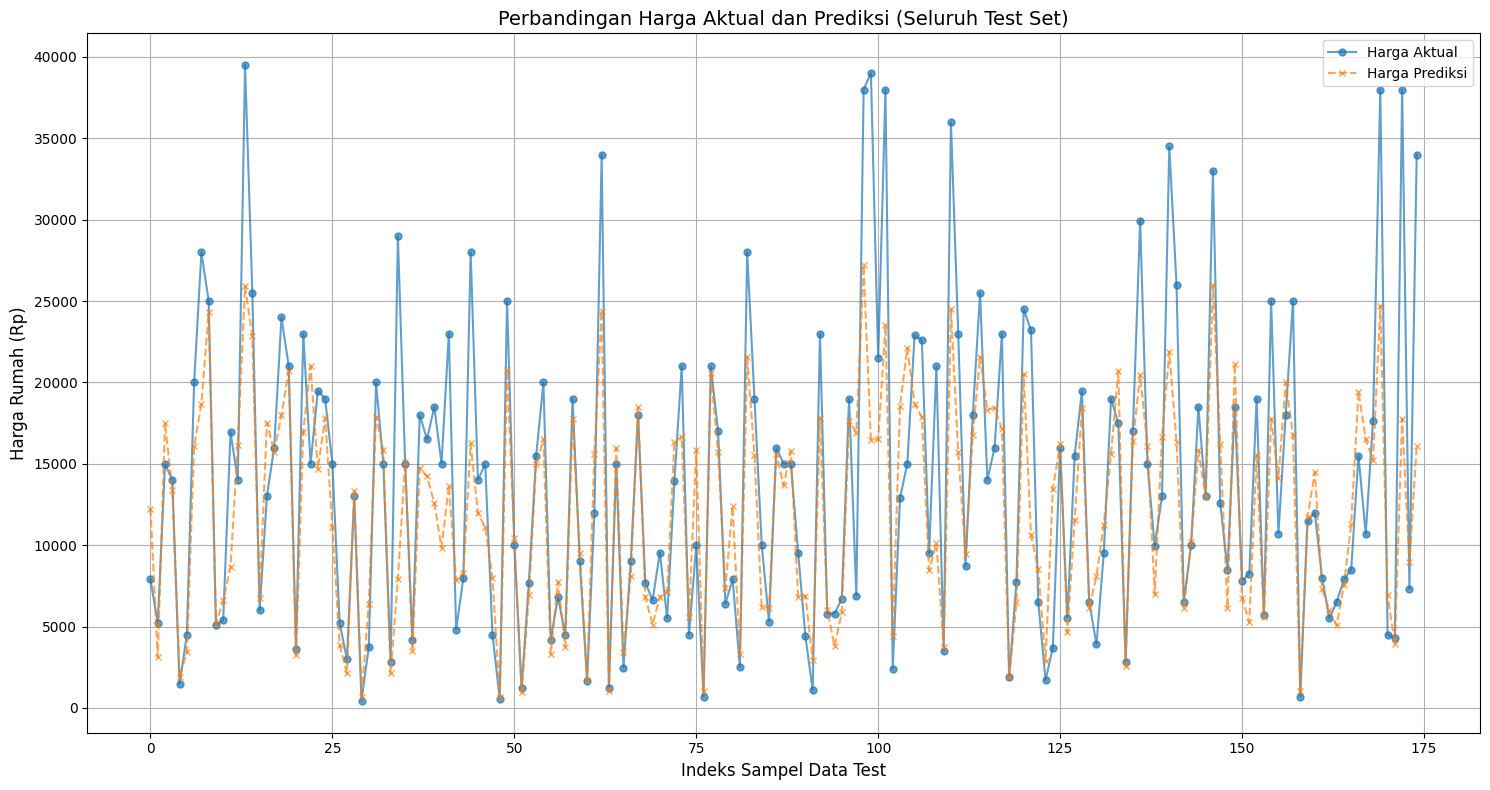

In [58]:
predictions_scaled = model.predict(X_test)
predictions_original_scale = scaler_y.inverse_transform(predictions_scaled)
y_test_original_scale = scaler_y.inverse_transform(y_test)

predictions_original_scale = np.expm1(predictions_original_scale)
y_test_original_scale = np.expm1(y_test_original_scale)

results_df_simple = pd.DataFrame({
    'Harga Aktual (Rp)': y_test_original_scale.flatten(),
    'Harga Prediksi (Rp)': predictions_original_scale.flatten()
})

pd.options.display.float_format = '{:,.0f}'.format

print(results_df_simple)

plt.figure(figsize=(15, 8))
plt.plot(results_df_simple['Harga Aktual (Rp)'].values, label='Harga Aktual', marker='o', linestyle='-', markersize=5, alpha=0.7)
plt.plot(results_df_simple['Harga Prediksi (Rp)'].values, label='Harga Prediksi', marker='x', linestyle='--', markersize=5, alpha=0.7)
plt.title(f'Perbandingan Harga Aktual dan Prediksi (Seluruh Test Set)', fontsize=14)
plt.xlabel('Indeks Sampel Data Test', fontsize=12)
plt.ylabel('Harga Rumah (Rp)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y') # Format sumbu y agar tidak notasi ilmiah
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test)


y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_log_unscaled = scaler_y.inverse_transform(y_pred_scaled)

y_pred_unscaled = np.expm1(y_pred_log_unscaled)


y_test_log_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled = np.expm1(y_test_log_unscaled)

mae_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
mse_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)
r2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)

print(f"Unscaled MAE: {mae_unscaled:.4f}")
print(f"Unscaled MSE: {mse_unscaled:.4f}")
print(f"Unscaled R2: {r2_unscaled:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Unscaled MAE: 3497.9861
Unscaled MSE: 29332047.7626
Unscaled R2: 0.6668


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf

if 'HARGA' not in df_filtered.columns:
    raise ValueError("DataFrame `df_filtered` must contain the target column 'HARGA'.")
if len(df_filtered.columns) <= 1 and 'HARGA' in df_filtered.columns :
    raise ValueError("DataFrame `df_filtered` must contain feature columns other than 'HARGA'.")

X = df_filtered.drop(columns='HARGA')
y = np.log1p(df_filtered['HARGA'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
r2_scores = []
models_list = [] 
scalers_X_list = []
scalers_y_list = [] 
histories = []

X_test_for_best_fold_final = None
y_test_for_best_fold_final = None
y_pred_for_best_fold_final = None

# --- K-Fold Cross-Validation Loop ---
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"--- Fold {i + 1}/5 ---")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    scalers_X_list.append(scaler_X)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
    scalers_y_list.append(scaler_y)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=25,
        restore_best_weights=True,
        mode='min',
        verbose=1
    )

    if 'model' not in locals() and 'model' not in globals():
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')


    history = model.fit(
        X_train_scaled, y_train_scaled,
        epochs=200,
        validation_data=(X_test_scaled, y_test_scaled),
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    histories.append(history)

    fold_model = tf.keras.models.clone_model(model)
    fold_model.set_weights(model.get_weights())
    fold_model.compile(optimizer=model.optimizer.name, loss=model.loss)
    models_list.append(fold_model)


    #  Prediction + Evaluation
    y_pred_fold_scaled = model.predict(X_test_scaled)

    if y_pred_fold_scaled.ndim == 1:
        y_pred_fold_scaled = y_pred_fold_scaled.reshape(-1, 1)

    y_pred_fold_log = scaler_y.inverse_transform(y_pred_fold_scaled)

    y_pred_fold_original_scale = np.expm1(y_pred_fold_log.flatten())

    y_test_original_scale = np.expm1(y_test.values)

    mae = mean_absolute_error(y_test_original_scale, y_pred_fold_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_fold_original_scale)

    print(f"Fold {i + 1} MAE: {mae:.2f}, R2: {r2:.4f}")
    mae_scores.append(mae)
    r2_scores.append(r2)



--- Fold 1/5 ---
Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2026 - mean_absolute_error: 0.3490 - val_loss: 0.1925 - val_mean_absolute_error: 0.3325
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1968 - mean_absolute_error: 0.3400 - val_loss: 0.1975 - val_mean_absolute_error: 0.3354
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2074 - mean_absolute_error: 0.3537 - val_loss: 0.2041 - val_mean_absolute_error: 0.3389
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2395 - mean_absolute_error: 0.3601 - val_loss: 0.2015 - val_mean_absolute_error: 0.3375
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2070 - mean_absolute_error: 0.3573 - val_loss: 0.1902 - val_mean_absolute_error: 0.3302
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2101 - mean_absolute_error: 0.3373 - val_loss: 0.2006 - val_mean_absolute_error: 0.3305
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1990 - mean_absolute_error: 

In [61]:
best_index = np.argmin(mae_scores)

best_model_from_list = models_list[best_index]
best_scaler_X = scalers_X_list[best_index]
best_scaler_y = scalers_y_list[best_index]

print(f'MAE fold terbaik: {mae_scores[best_index]:.2f}')
print(f'R2 fold terbaik: {r2_scores[best_index]:.4f}')

MAE fold terbaik: 2858.52
R2 fold terbaik: 0.7652


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


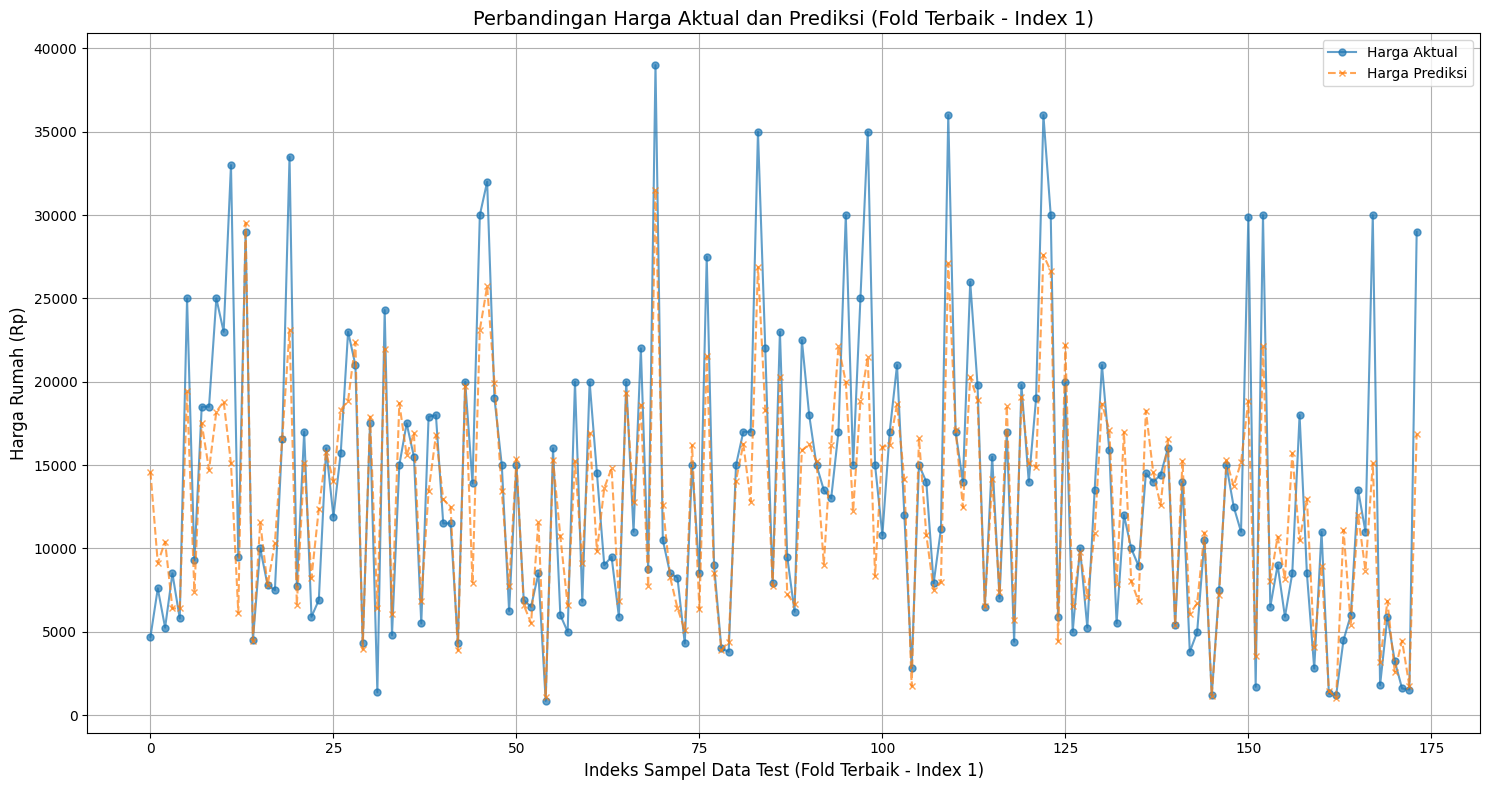

In [62]:
all_splits = list(kf.split(X))
_, test_idx_bf = all_splits[best_index]

X_test_for_best_fold_final = X.iloc[test_idx_bf]
y_test_log_for_best_fold = y.iloc[test_idx_bf]

X_test_bf_scaled = best_scaler_X.transform(X_test_for_best_fold_final)

y_pred_bf_scaled = best_model_from_list.predict(X_test_bf_scaled)
y_pred_bf_scaled = y_pred_bf_scaled.reshape(-1, 1)

y_pred_bf_log = best_scaler_y.inverse_transform(y_pred_bf_scaled)
y_pred_for_best_fold_final = np.expm1(y_pred_bf_log.flatten())

y_test_for_best_fold_final = np.expm1(y_test_log_for_best_fold.values.flatten())

results_df_simple_for_plot = pd.DataFrame({
    'Harga Aktual (Rp)': y_test_for_best_fold_final,
    'Harga Prediksi (Rp)': y_pred_for_best_fold_final
})

plt.figure(figsize=(15, 8))
plt.plot(results_df_simple_for_plot['Harga Aktual (Rp)'].values, label='Harga Aktual', marker='o', linestyle='-', markersize=5, alpha=0.7)
plt.plot(results_df_simple_for_plot['Harga Prediksi (Rp)'].values, label='Harga Prediksi', marker='x', linestyle='--', markersize=5, alpha=0.7)
plt.title(f'Perbandingan Harga Aktual dan Prediksi (Fold Terbaik - Index {best_index})', fontsize=14)
plt.xlabel(f'Indeks Sampel Data Test (Fold Terbaik - Index {best_index})', fontsize=12)
plt.ylabel('Harga Rumah (Rp)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## KESIMPULAN

Dari hasil training yang telah dilakukan, setelah pembersihan data, feature engineering, dan metode lain yang berkontribusi untuk melakukan training model didapatkan sebagai berikut:

1. tanpa KFOLD:
- MAE: 3497.9861
- R2: 0.6668

2. dengan KFOLD
- MAE fold terbaik: 2858.52
- R2 fold terbaik: 0.7652
